In [ ]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.optimize import curve_fit
import importlib

import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
#%matplotlib widget

from tqdm import tqdm
import io, sys
from contextlib import redirect_stdout, redirect_stderr

import os

import h5py
import hdf5plugin

import sys
sys.path.append('./XPCS_library/')

import ID10_tools as ID10
from ID10_tools import Nx, Ny, Npx
importlib.reload(ID10)
ID10.set_version('v2')

import XPCS_tools as XPCS
from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorelation_f
importlib.reload(XPCS)
XPCS.set_beamline('ID10')

import COSMICRAY_tools as COSMIC
importlib.reload(COSMIC)
COSMIC.set_beamline('ID10')

# RAW FOLDER PATH
raw_folder = '../RAW_DATA/'
masks_folder = '../masks/'
fit_outs_folder = './data/fit_outs/'
Idts_folder = './data/Idts/'

# EXPERIMENTAL VARIABLES
XPCS.set_expvar(1350, 1350, 7)
ID10.Nfmax_dense_file = 2000
ID10.Nfmax_sparse_file = 5000

## Load masks

In [2]:
e4m_htmask = np.load(masks_folder+'e4m_htmask_copper_foil_30um_1_1'+'.npy')
e4m_mask = np.load(masks_folder+'e4m_mask'+'.npy')
#bs_mask = np.load(masks_folder+'bs_mask_copper_foil_30um'+'.npy')  # beam-stop mask

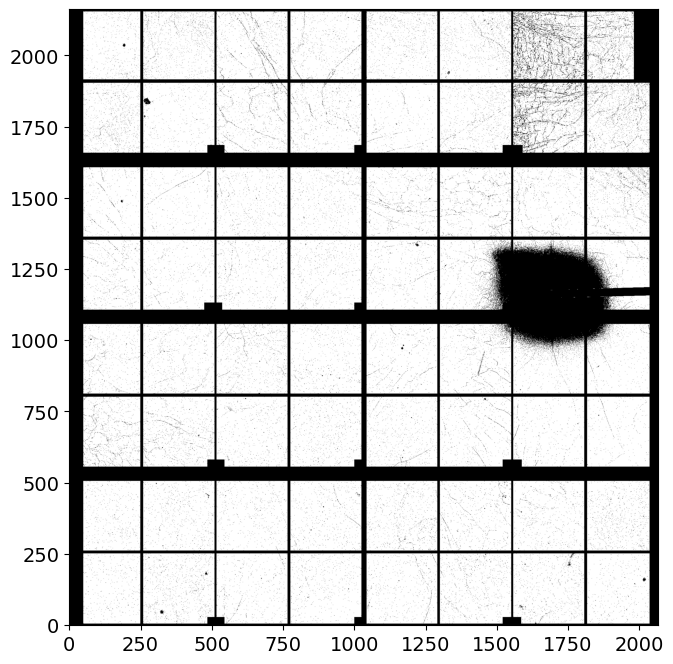

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow((e4m_mask*e4m_htmask).reshape(Nx,Ny), cmap='gray', origin='lower')

### BS mask and Q definition
Using a random scan in GeO2_6, because we are not changing the measurement configuration

#### Beamstop mask

In [4]:
#######################################
sample_name = 'GeO2_6'
Ndataset = 1
Nscan =12
Nfi, Nff = 0, 1000
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

#############################
command = mtimescan 0.02 1 220000
Ei = 9.699998837562536
itime = 0.0201
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/1 loops)
Done!
Concatenating vectors ...
Done!
	 | Sparse array loaded from ../RAW_DATA/GeO2_6/GeO2_6_0001/scan0012/
	 | Shape:       (1000, 4471016)
	 | Sparsity:     3.8e-03
	 | Memory usage (scipy.csr_array): 0.192 GB (np.array usage: 16.656 GB)


################################################################################
Maximum count in the hull run -> 4689
# of pixels above Ith_high treshold ->  75 pixels (of 4471016 => 0.0 %)
################################################################################



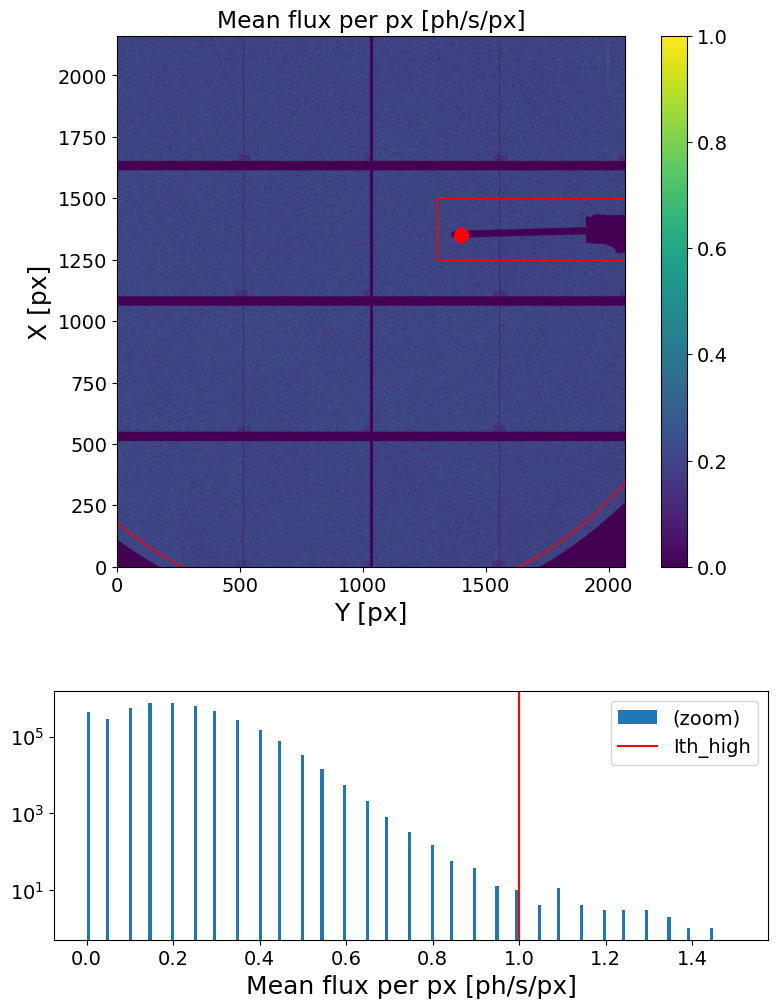

In [5]:
geom = [{'geom':'Rectangle', 'x0':1250, 'y0':1300, 'xl':250, 'yl':1950, 'inside':False},
        {'geom':'Circle', 'Cx':1300, 'Cy':950, 'r':1470, 'inside':True}, 
        ]
XPCS.gen_plots4mask(e4m_data, itime, Ith_high=1, Nff=10000, mask_geom=geom,)

#################################################
Masked area =  93.74594052000708 %
#################################################



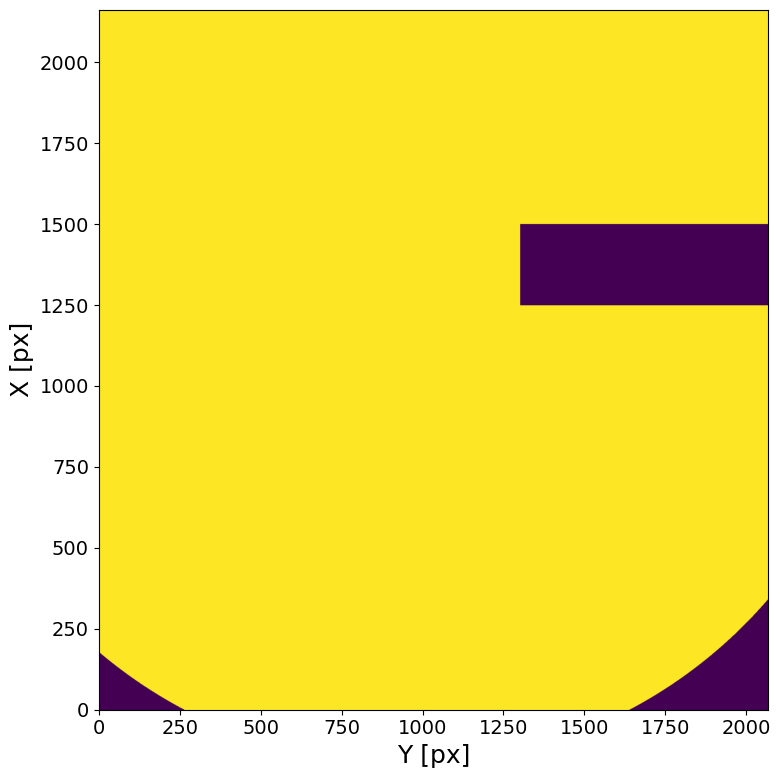

In [6]:
bs_mask = XPCS.gen_mask(e4m_data, itime, e4m_mask=None, mask_geom=geom)

#### Q mask

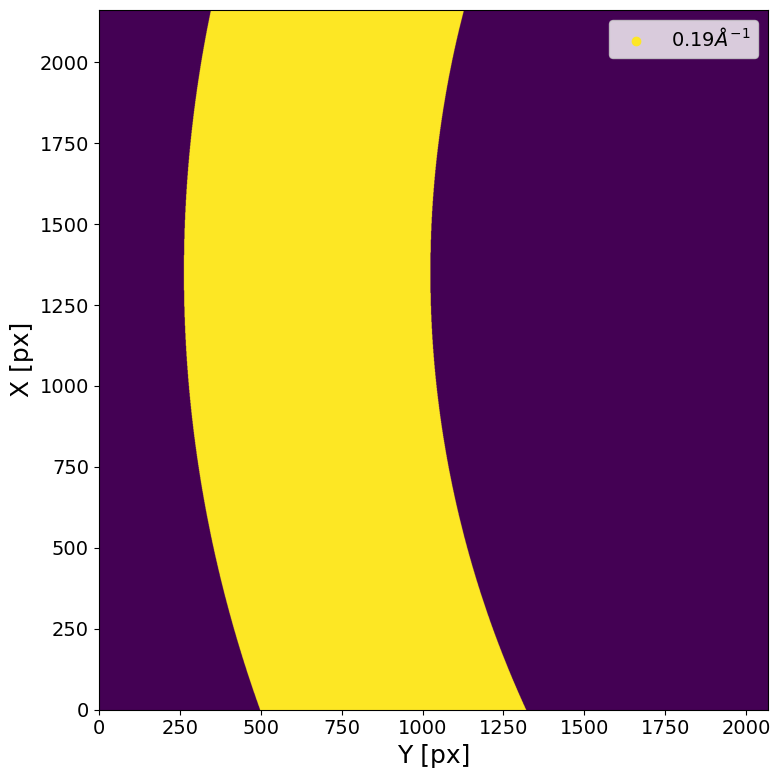

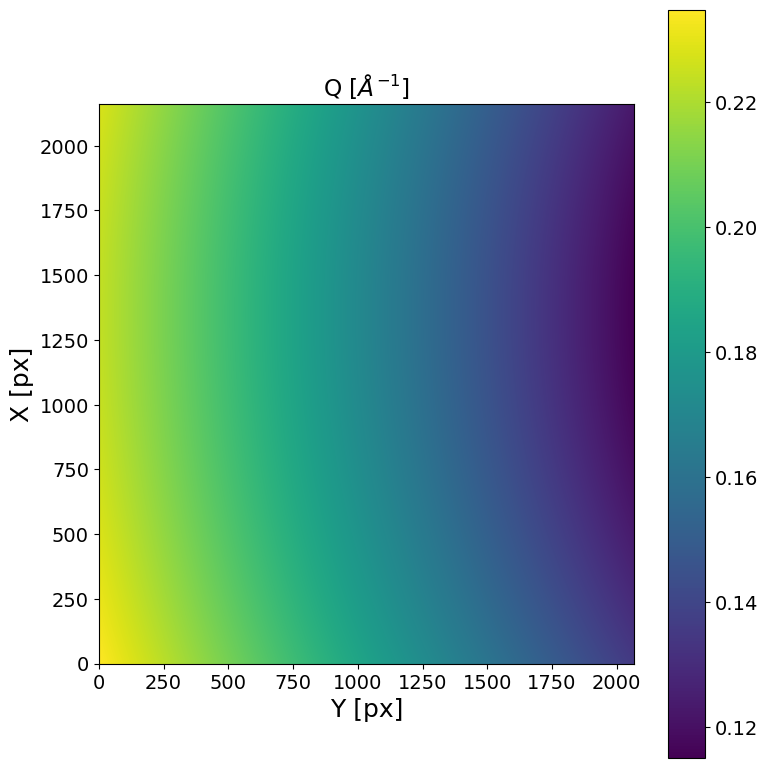

In [7]:
Qmask = XPCS.gen_Qmask(Ei, theta, .19, .02, Qmap_plot=True)

## XPCS scan (T = 415C Q =  0.19 Å, 50 min @ 1ms (3_000_000 fm)) (GeO2_3, dataset 1, scan 4)

In [8]:
#######################################
sample_name = 'GeO2_3_415C'
Ndataset = 1
Nscan = 4
Nfi, Nff =  None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
#e4m_data = ID10.load_dense_e4m_new(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 2999568
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/600 loop

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  9 pixels (of 4471016 => 0.0 %)
################################################################################



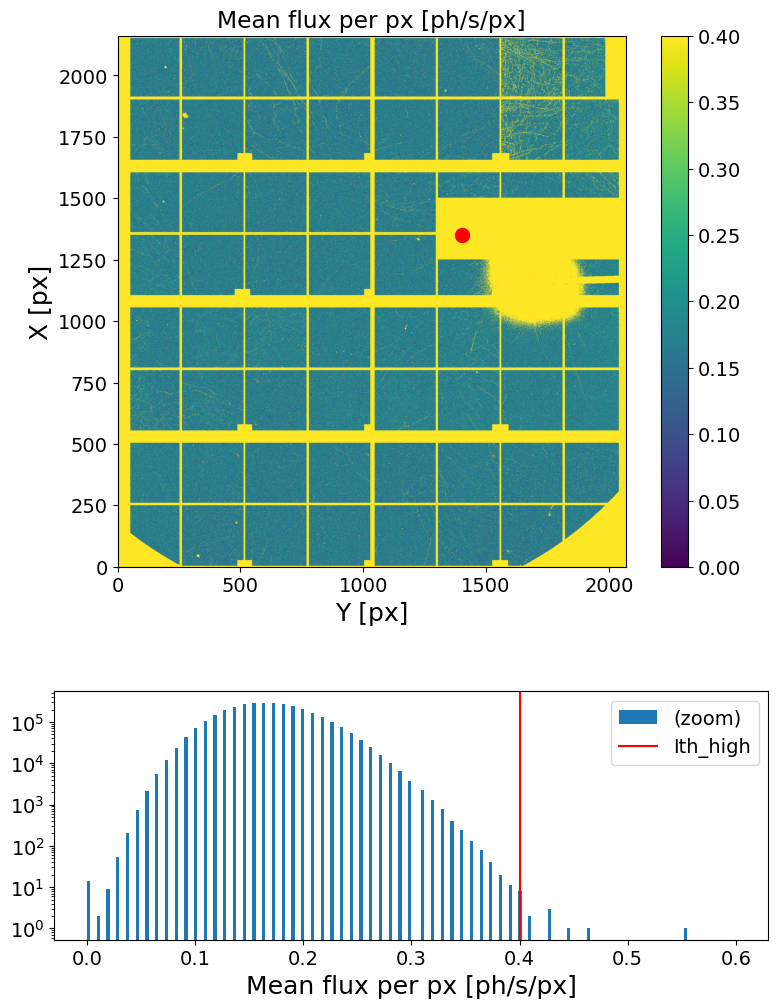

In [9]:
#############################################
mask = e4m_mask * e4m_htmask * bs_mask
#############################################

XPCS.gen_plots4mask(e4m_data, itime, Ith_high= .4, Nff=100_000, e4m_mask=mask)

### Intensity analysis

In [10]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idts_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

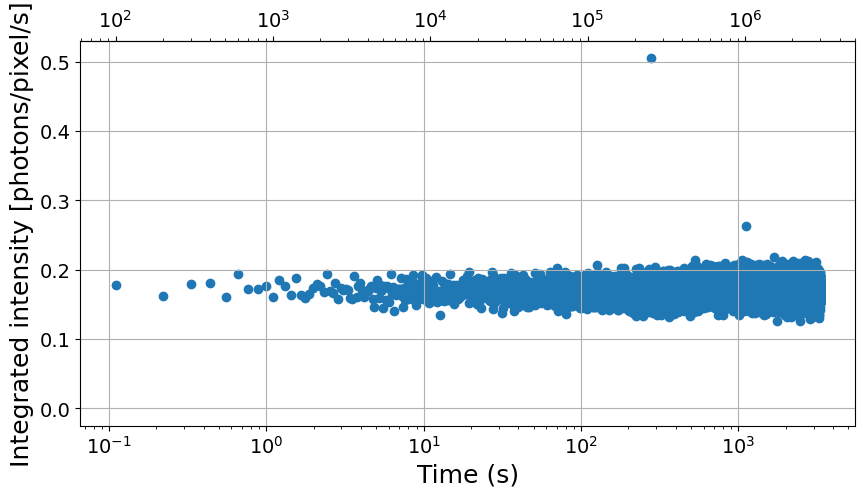

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')

plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.xscale('log')
#plt.xlim(1e-2, 1)
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.grid()

### Correlation

In [12]:
###################
Nfi = 1
Nff = None
Lbin = 10
Nbunch = 30
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
###################
if Nfi == None: Nfi = 0
if Nff == None: Nff = e4m_data.shape[0]
if Lbin == None: Lbin = 1


Lbunch = (Nff-Nfi)//Nbunch

t, g2, t_mt, g2_mt = {}, {}, {}, {}

for i in range(Nbunch):
    
    print('Computing G2t for bunch', i+1, '(Nfi =', Nfi+i*Lbunch, ', Nff =', Nfi+(i+1)*Lbunch, ') ...')
    G2t = XPCS.get_G2t(e4m_data, mask, Nfi=Nfi+i*Lbunch, Nff=Nfi+(i+1)*Lbunch, Lbin=Lbin)

    t_bunch = round(itime*Lbunch*Nbunch*(i+1/2),1)

    t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, G2t, cython=False)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2_mt(itime*Lbin, g2[t_bunch])   



Computing G2t for bunch 1 (Nfi = 1 , Nff = 99986 ) ...
Loading frames ...
Done! (elapsed time = 0.83 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 1.81 s)
	 | 9998 frames X 4471016 pixels
	 | sparsity = 1.72e-03
	 | memory usage (sparse.csr_array @ float64) = 0.858 GB
Masking data ...
Done! (elapsed time = 1.12 s)
	 | 9998 frames X 1424709 pixels
	 | sparsity = 1.85e-03
	 | memory usage (sparse.csr_array @ float64) = 0.294 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 1.5 s)
	 | 9998 X 9998 squared matrix
	 | memory usage (np.array @ float64) = 0.745 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.39 s)

Computing g2...
Done! (elapsed time = 0.41 s)

Computing G2t for bunch 2 (Nfi = 99986 , Nff = 199971 ) ...
Loading frames ...
Done! (elapsed time = 0.53 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 1.61 s)
	 | 9998 frames X 4471016 pixels
	 | sparsity = 1.71e-03
	 | memory usage (sparse.csr

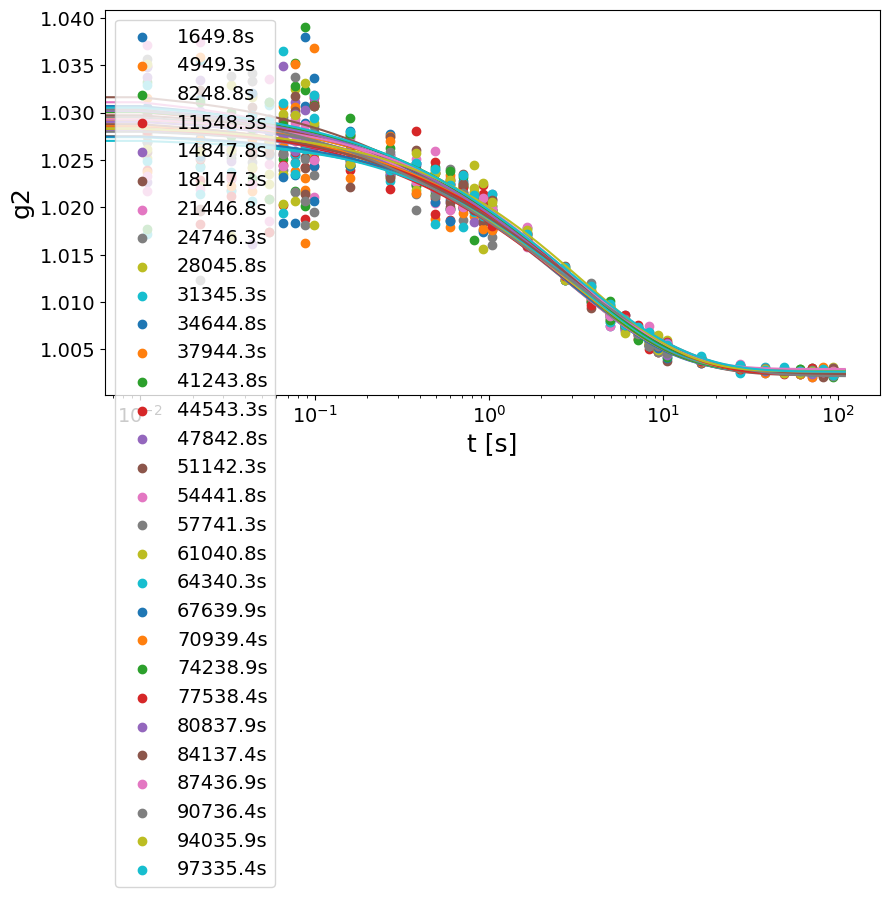

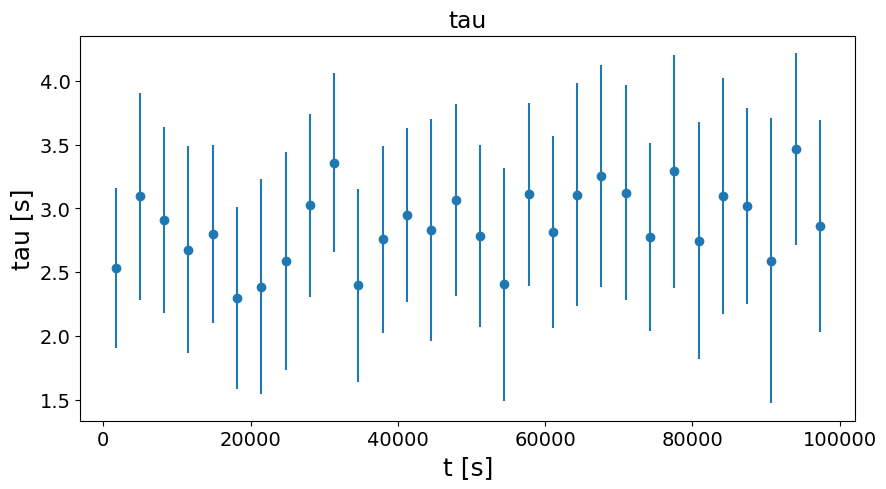

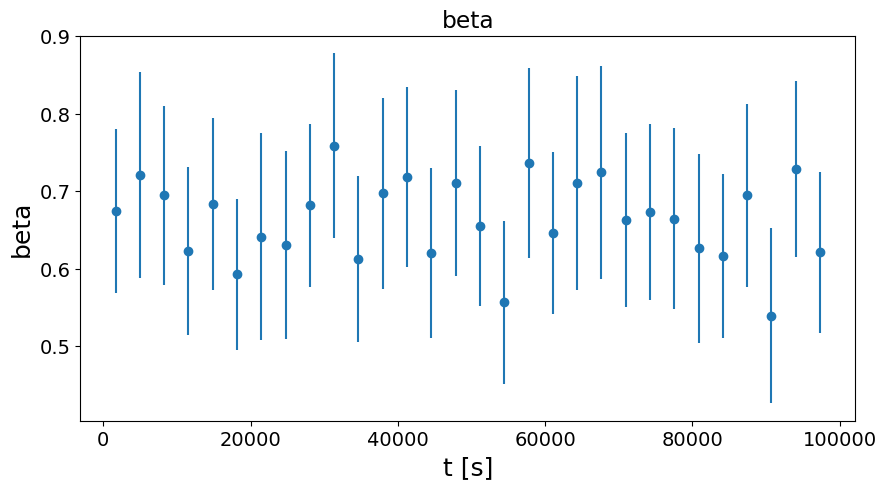

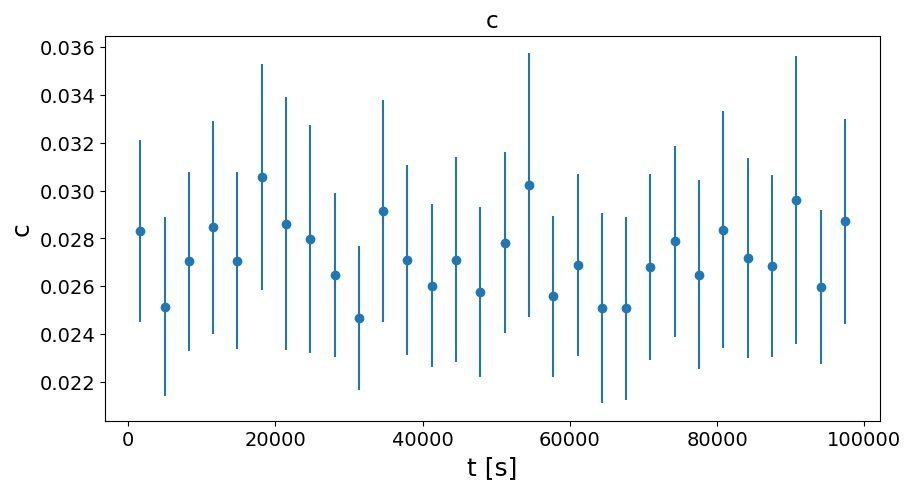

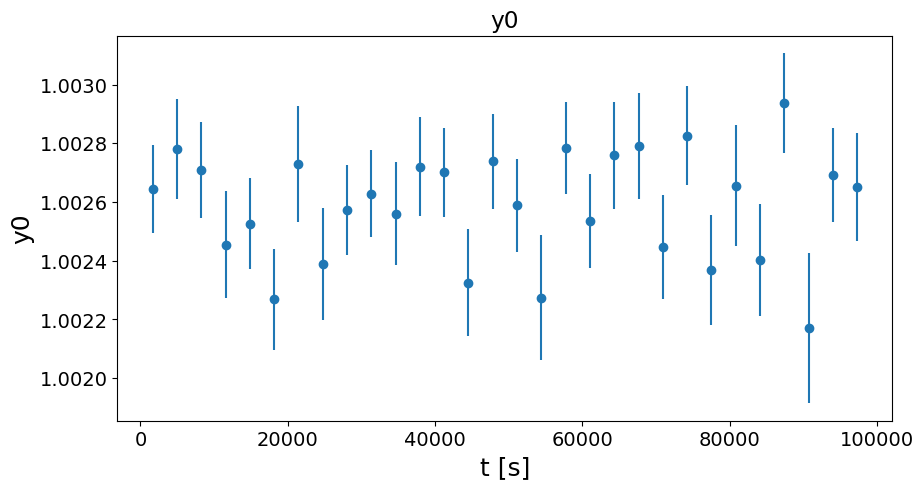

In [13]:
##################
t1_fit = 0
t2_fit = 1e8
##################
 
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'
for k in g2.keys():
    #plt.scatter(t[k], g2[k], s=1, label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], label=str(k)+'s')

    popt, pcov = curve_fit(decorelation_f, t[k][(t1_fit<t[k])*(t[k]<t2_fit)], g2[k][(t1_fit<t[k])*(t[k]<t2_fit)], p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf]))
    fit_out.loc[k] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
    
    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorelation_f(x, *popt)
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()



plt.figure(figsize=(10,5))
plt.title('tau')
plt.errorbar(fit_out.index, fit_out.tau,  yerr=fit_out.dtau, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('tau [s]')
plt.show()

plt.figure(figsize=(10,5))
plt.title('beta')
plt.errorbar(fit_out.index, fit_out.beta,  yerr=fit_out.dbeta, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('beta')
plt.show()

plt.figure(figsize=(10,5))
plt.title('c')
plt.errorbar(fit_out.index, fit_out.c,  yerr=fit_out.dc, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('c')
plt.show()

plt.figure(figsize=(10,5))
plt.title('y0')
plt.errorbar(fit_out.index, fit_out.y0,  yerr=fit_out.dy0, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('y0')
plt.show()  

## XPCS scan (T = 450C Q =  0.19 Å, 50 min @ 1ms (3_000_000 fm)) (GeO2_3, dataset 1, scan 4)

In [14]:
#######################################
sample_name = 'GeO2_3_450C'
Ndataset = 1
Nscan = 4
Nfi, Nff =  None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
#e4m_data = ID10.load_dense_e4m_new(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 2999568
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/600 loop

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  22 pixels (of 4471016 => 0.0 %)
################################################################################



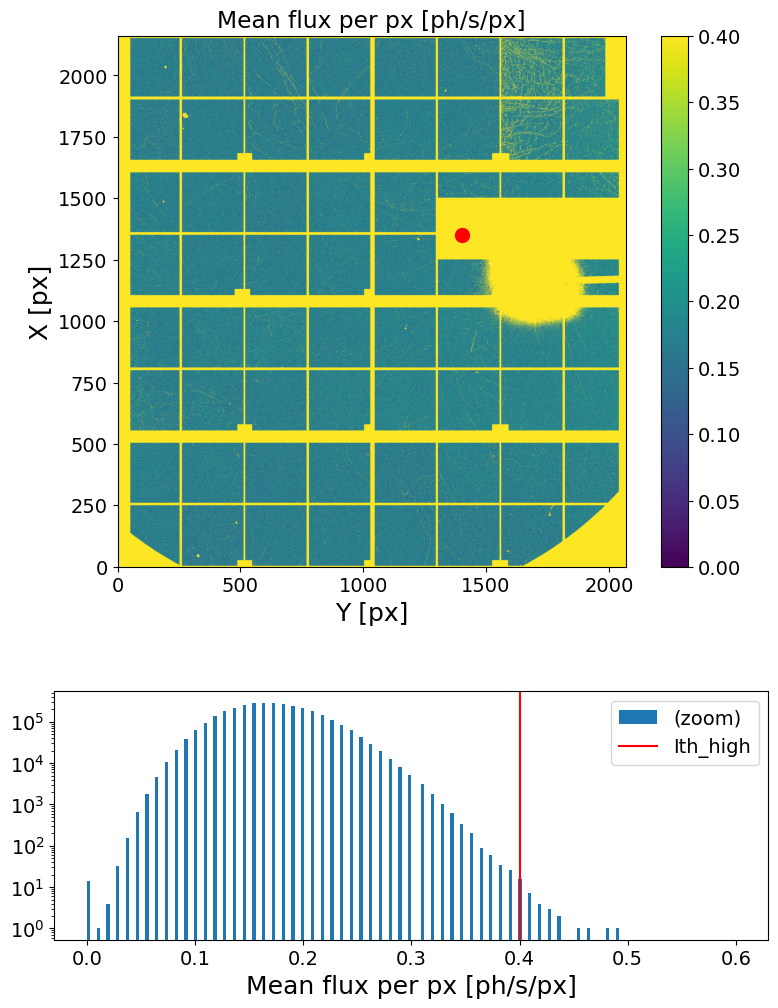

In [15]:
#############################################
mask = e4m_mask * e4m_htmask * bs_mask
#############################################

XPCS.gen_plots4mask(e4m_data, itime, Ith_high= .4, Nff=100_000, e4m_mask=mask)

### Intensity analysis

In [16]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idts_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

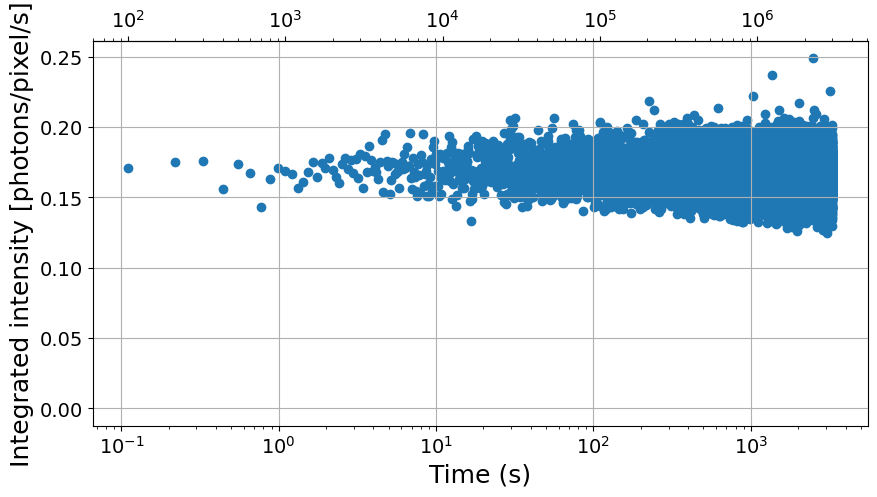

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')

plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.xscale('log')
#plt.xlim(1e-2, 1)
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.grid()

### Correlation

In [18]:
###################
Nfi = 1
Nff = None
Lbin = 10
Nbunch = 30
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
###################
if Nfi == None: Nfi = 0
if Nff == None: Nff = e4m_data.shape[0]
if Lbin == None: Lbin = 1


Lbunch = (Nff-Nfi)//Nbunch

t, g2, t_mt, g2_mt = {}, {}, {}, {}

for i in range(Nbunch):
    
    print('Computing G2t for bunch', i+1, '(Nfi =', Nfi+i*Lbunch, ', Nff =', Nfi+(i+1)*Lbunch, ') ...')
    G2t = XPCS.get_G2t(e4m_data, mask, Nfi=Nfi+i*Lbunch, Nff=Nfi+(i+1)*Lbunch, Lbin=Lbin)

    t_bunch = round(itime*Lbunch*Nbunch*(i+1/2),1)

    t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, G2t, cython=False)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2_mt(itime*Lbin, g2[t_bunch])   



Computing G2t for bunch 1 (Nfi = 1 , Nff = 99986 ) ...
Loading frames ...
Done! (elapsed time = 0.49 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 0.89 s)
	 | 9998 frames X 4471016 pixels
	 | sparsity = 1.75e-03
	 | memory usage (sparse.csr_array @ float64) = 0.875 GB
Masking data ...
Done! (elapsed time = 1.05 s)
	 | 9998 frames X 1424709 pixels
	 | sparsity = 1.87e-03
	 | memory usage (sparse.csr_array @ float64) = 0.297 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 1.12 s)
	 | 9998 X 9998 squared matrix
	 | memory usage (np.array @ float64) = 0.745 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.04 s)

Computing g2...
Done! (elapsed time = 0.17 s)

Computing G2t for bunch 2 (Nfi = 99986 , Nff = 199971 ) ...
Loading frames ...
Done! (elapsed time = 0.49 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 1.02 s)
	 | 9998 frames X 4471016 pixels
	 | sparsity = 1.75e-03
	 | memory usage (sparse.cs

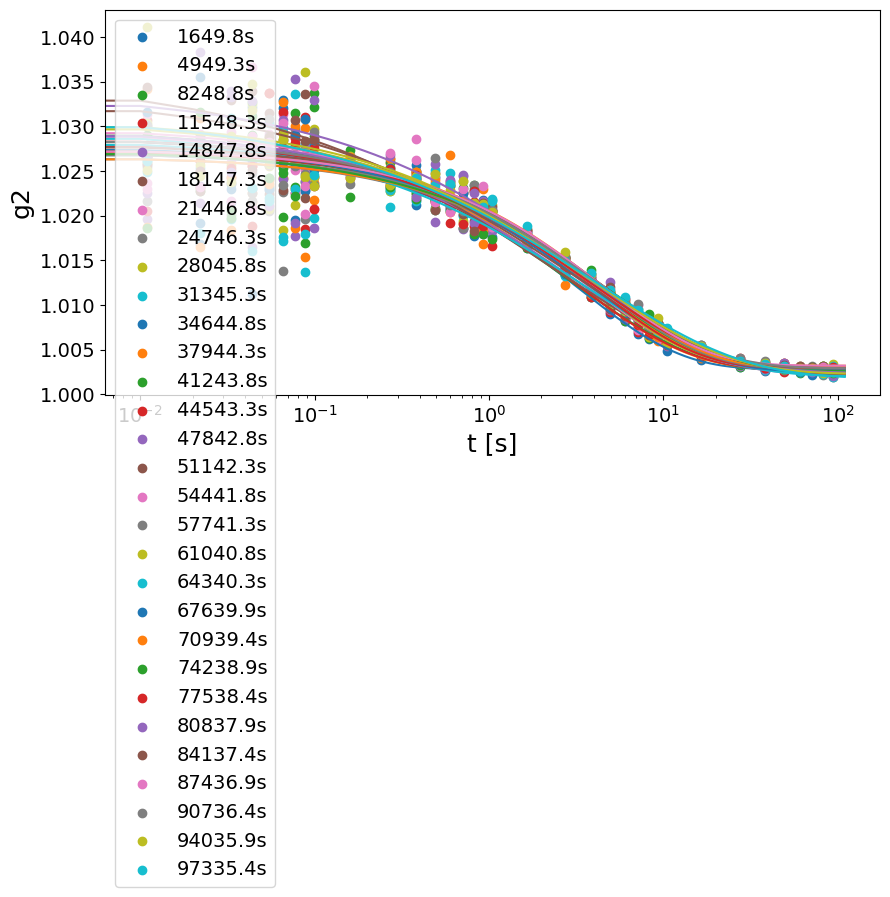

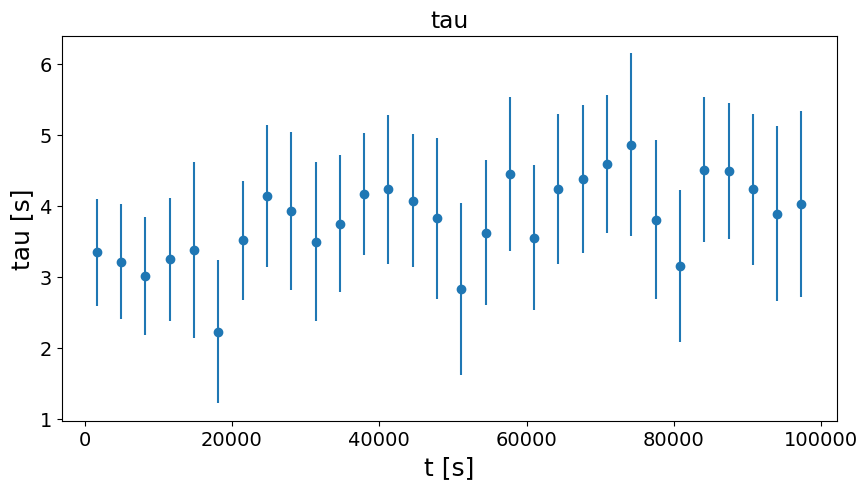

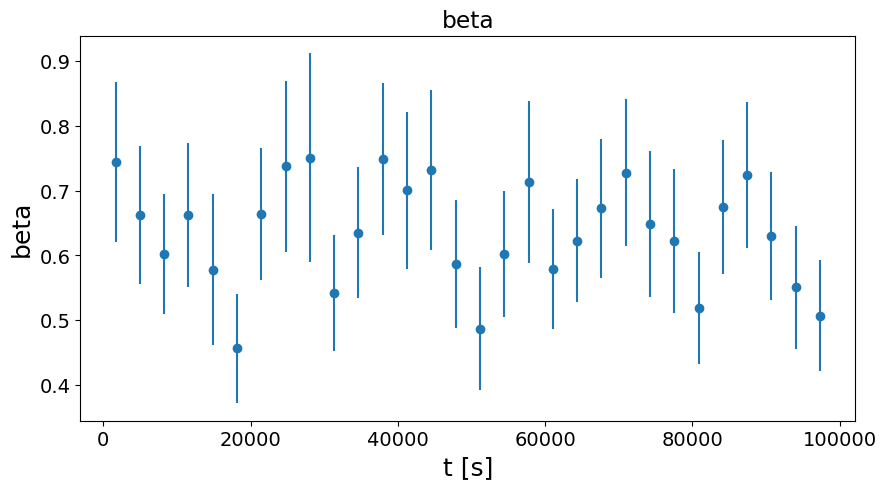

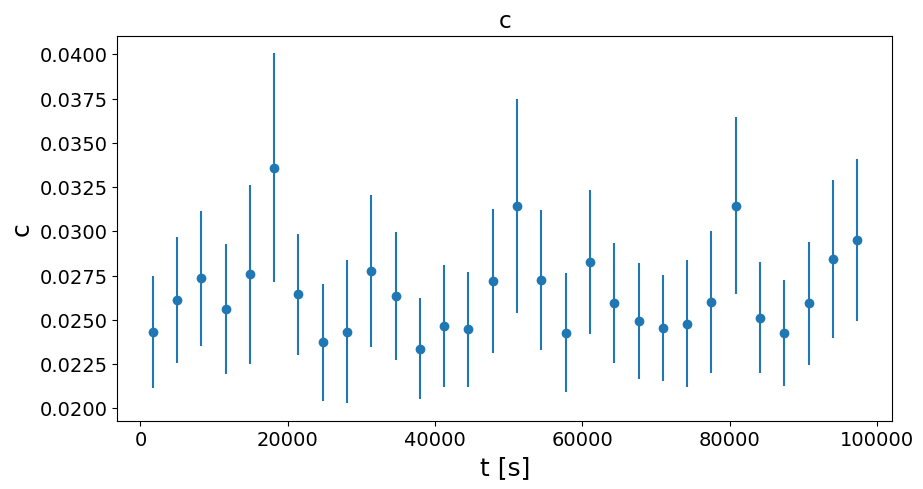

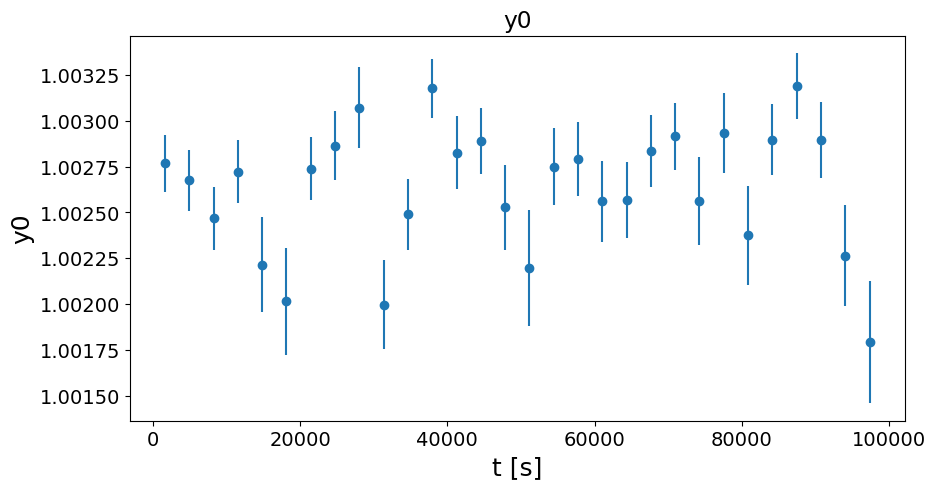

In [19]:
##################
t1_fit = 0
t2_fit = 1e8
##################
 
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'
for k in g2.keys():
    #plt.scatter(t[k], g2[k], s=1, label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], label=str(k)+'s')

    popt, pcov = curve_fit(decorelation_f, t[k][(t1_fit<t[k])*(t[k]<t2_fit)], g2[k][(t1_fit<t[k])*(t[k]<t2_fit)], p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf]))
    fit_out.loc[k] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
    
    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorelation_f(x, *popt)
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()



plt.figure(figsize=(10,5))
plt.title('tau')
plt.errorbar(fit_out.index, fit_out.tau,  yerr=fit_out.dtau, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('tau [s]')
plt.show()

plt.figure(figsize=(10,5))
plt.title('beta')
plt.errorbar(fit_out.index, fit_out.beta,  yerr=fit_out.dbeta, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('beta')
plt.show()

plt.figure(figsize=(10,5))
plt.title('c')
plt.errorbar(fit_out.index, fit_out.c,  yerr=fit_out.dc, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('c')
plt.show()

plt.figure(figsize=(10,5))
plt.title('y0')
plt.errorbar(fit_out.index, fit_out.y0,  yerr=fit_out.dy0, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('y0')
plt.show()  

## XPCS scan (T = 485C Q =  0.19 Å, 50 min @ 1ms (3_000_000 fm)) (GeO2_3, dataset 1, scan 4)

In [20]:
#######################################
sample_name = 'GeO2_3_485C'
Ndataset = 1
Nscan = 4
Nfi, Nff =  None, None
#######################################

scan = ID10.load_scan(raw_folder, sample_name, Ndataset, Nscan)
Ei = scan['monoe']
itime = scan['fast_timer_period'][0]
theta = scan['delcoup']
Q = round(XPCS.theta2Q(Ei,  theta),2)

print('#############################')
print('command =', scan['command'])
print('Ei =', Ei)
print('itime =', itime)
print('theta =', theta)
print('Q =', Q)
print('#############################\n')

e4m_data = ID10.load_sparse_e4m(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )
#e4m_data = ID10.load_dense_e4m_new(raw_folder, sample_name, Ndataset, Nscan, Nfi, Nff,  n_jobs=1, )

e4m_data = COSMIC.fast_gamma_filter(e4m_data, Imaxth_high=5)

#############################
command = mtimescan 0.001 1 2999568
Ei = 9.699998837562536
itime = 0.0011
theta = 1.7500000000000004
Q = 0.15
#############################

Loading sparse array ...
	 -> loading file eiger4m_v2_sparse_frame_0_00000.h5 (1/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00001.h5 (2/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00002.h5 (3/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00003.h5 (4/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00004.h5 (5/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00005.h5 (6/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00006.h5 (7/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00007.h5 (8/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00008.h5 (9/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00009.h5 (10/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00010.h5 (11/600 loops)
	 -> loading file eiger4m_v2_sparse_frame_0_00011.h5 (12/600 loop

### Flux check

################################################################################
Maximum count in the hull run -> 5
# of pixels above Ith_high treshold ->  19 pixels (of 4471016 => 0.0 %)
################################################################################



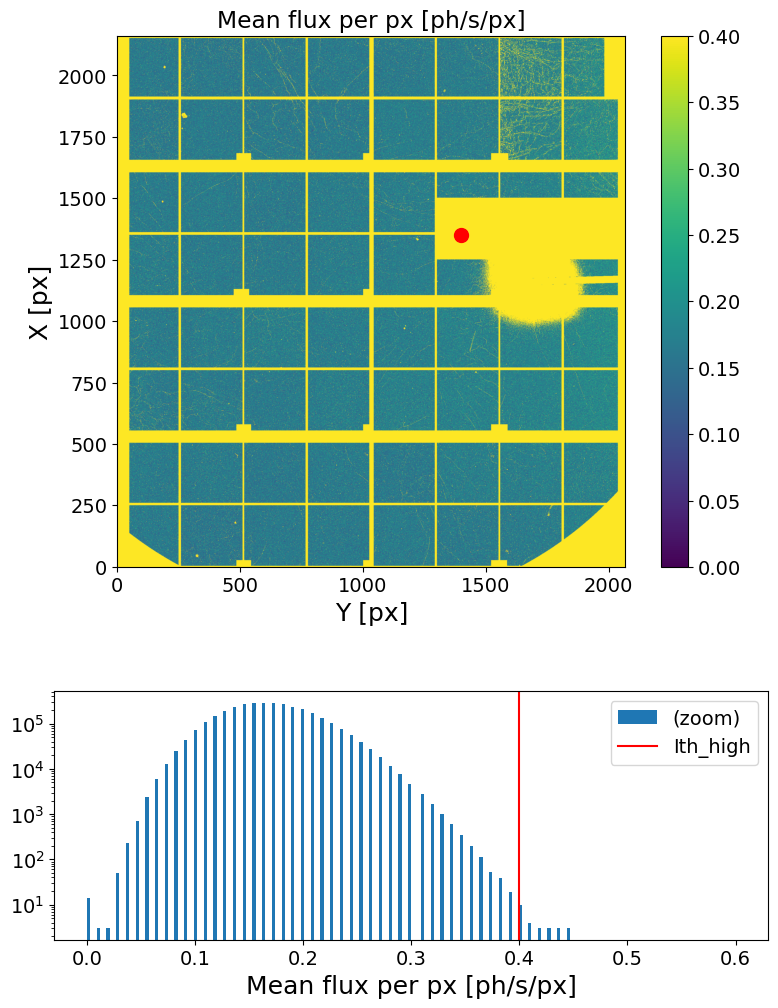

In [21]:
#############################################
mask = e4m_mask * e4m_htmask * bs_mask
#############################################

XPCS.gen_plots4mask(e4m_data, itime, Ith_high= .4, Nff=100_000, e4m_mask=mask)

### Intensity analysis

In [22]:
####################
Lbin = 1
Nstep = 100
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
####################

t_It, It = XPCS.get_It(e4m_data, itime, mask=mask, Lbin=Lbin, Nstep=Nstep)
np.savez(Idts_folder+'Idt_'+sample_name+'_'+str(Ndataset).zfill(4)+'_'+str(Nscan).zfill(4), t_It=t_It, It=It)

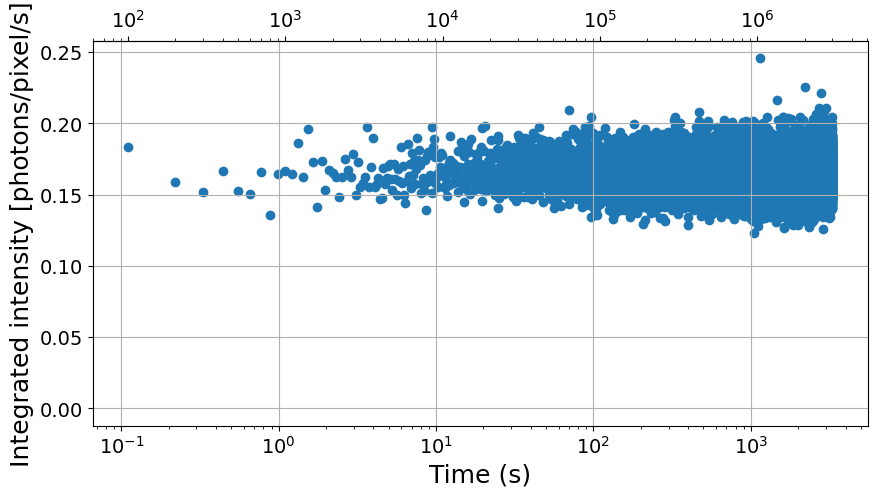

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(t_It, It, label='It')

plt.xlabel('Time (s)')
plt.ylabel('Integrated intensity [photons/pixel/s]')
plt.xscale('log')
#plt.xlim(1e-2, 1)
plt.gca().secondary_xaxis('top', functions=(lambda x: x/itime, lambda x: x*itime))
plt.grid()

### Correlation

In [24]:
###################
Nfi = 1
Nff = None
Lbin = 10
Nbunch = 30
mask = e4m_mask * e4m_htmask * bs_mask * Qmask
###################
if Nfi == None: Nfi = 0
if Nff == None: Nff = e4m_data.shape[0]
if Lbin == None: Lbin = 1


Lbunch = (Nff-Nfi)//Nbunch

t, g2, t_mt, g2_mt = {}, {}, {}, {}

for i in range(Nbunch):
    
    print('Computing G2t for bunch', i+1, '(Nfi =', Nfi+i*Lbunch, ', Nff =', Nfi+(i+1)*Lbunch, ') ...')
    G2t = XPCS.get_G2t(e4m_data, mask, Nfi=Nfi+i*Lbunch, Nff=Nfi+(i+1)*Lbunch, Lbin=Lbin)

    t_bunch = round(itime*Lbunch*Nbunch*(i+1/2),1)

    t[t_bunch], g2[t_bunch] = XPCS.get_g2(itime*Lbin, G2t, cython=False)
    t_mt[t_bunch], g2_mt[t_bunch] = XPCS.get_g2_mt(itime*Lbin, g2[t_bunch])   



Computing G2t for bunch 1 (Nfi = 1 , Nff = 99986 ) ...
Loading frames ...
Done! (elapsed time = 0.99 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 1.1 s)
	 | 9998 frames X 4471016 pixels
	 | sparsity = 1.73e-03
	 | memory usage (sparse.csr_array @ float64) = 0.863 GB
Masking data ...
Done! (elapsed time = 1.03 s)
	 | 9998 frames X 1424709 pixels
	 | sparsity = 1.82e-03
	 | memory usage (sparse.csr_array @ float64) = 0.29 GB
Computing G2t (using MKL library)...
Done! (elapsed time = 1.11 s)
	 | 9998 X 9998 squared matrix
	 | memory usage (np.array @ float64) = 0.745 GB
Normalizing G2t (using NumExpr library)...
Done! (elapsed time = 0.05 s)

Computing g2...
Done! (elapsed time = 0.18 s)

Computing G2t for bunch 2 (Nfi = 99986 , Nff = 199971 ) ...
Loading frames ...
Done! (elapsed time = 0.47 s)
Binning frames (Lbin = 10, using MKL library) ...
Done! (elapsed time = 0.98 s)
	 | 9998 frames X 4471016 pixels
	 | sparsity = 1.73e-03
	 | memory usage (sparse.csr_

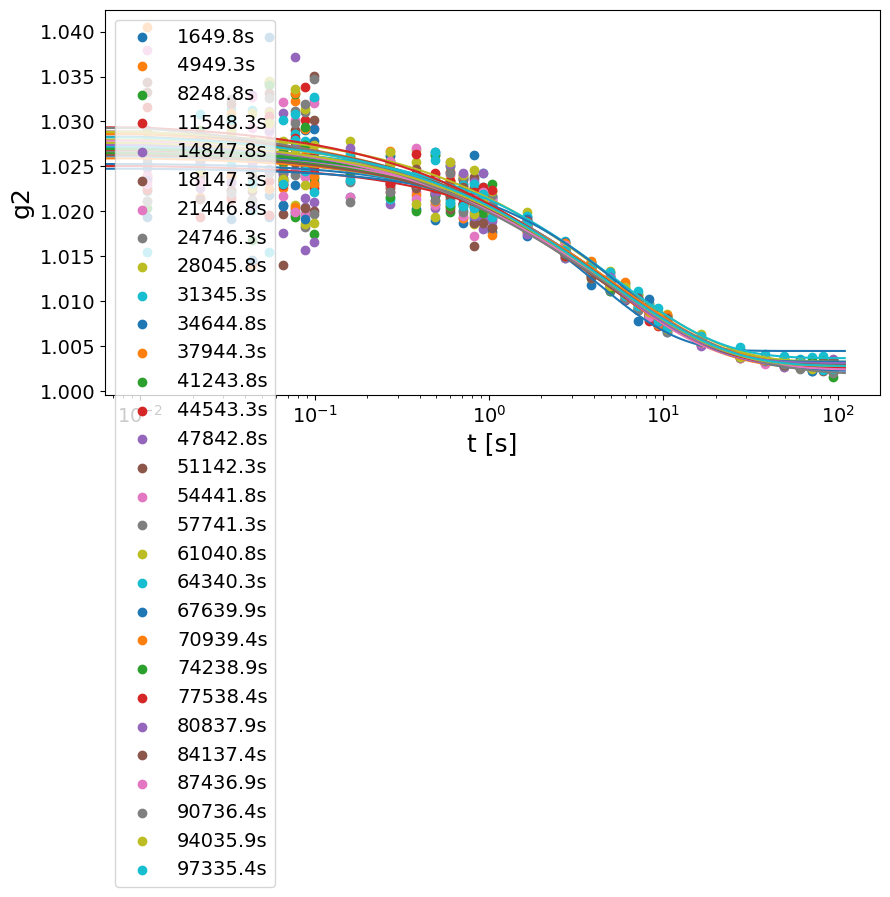

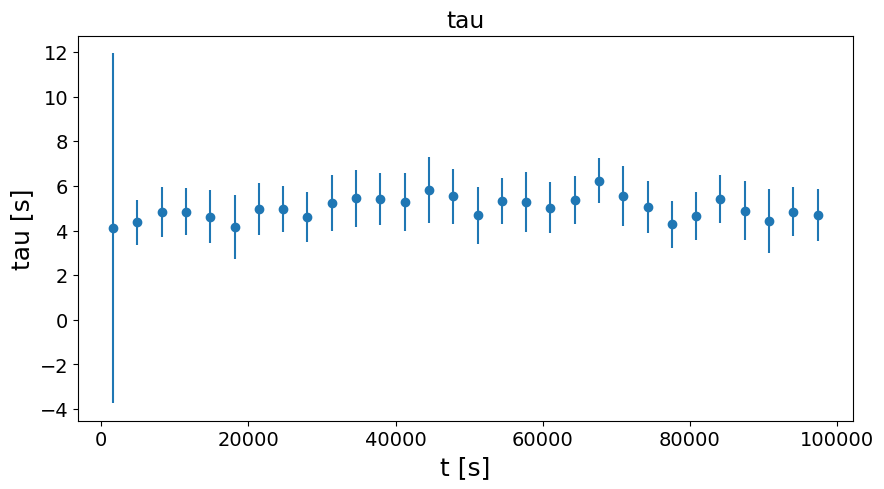

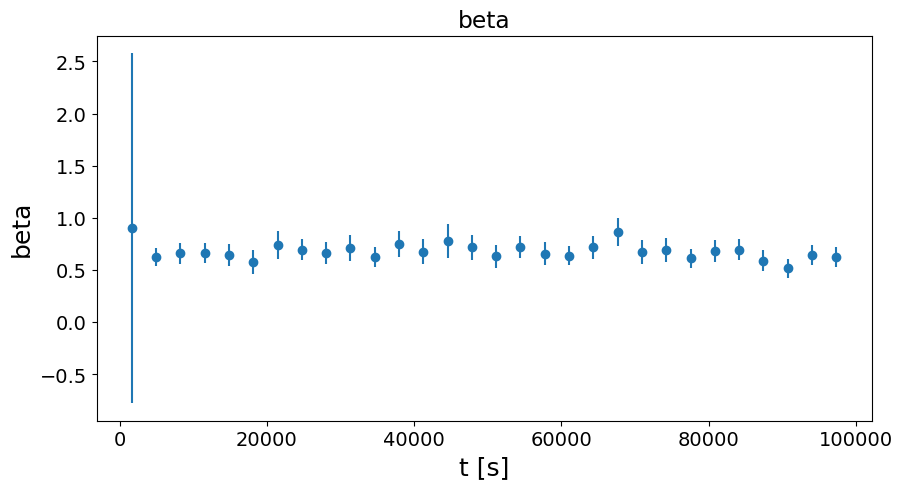

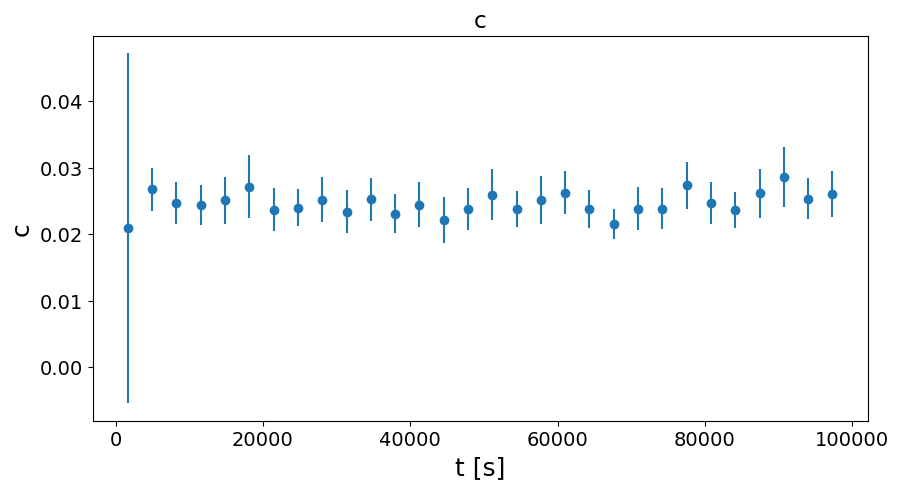

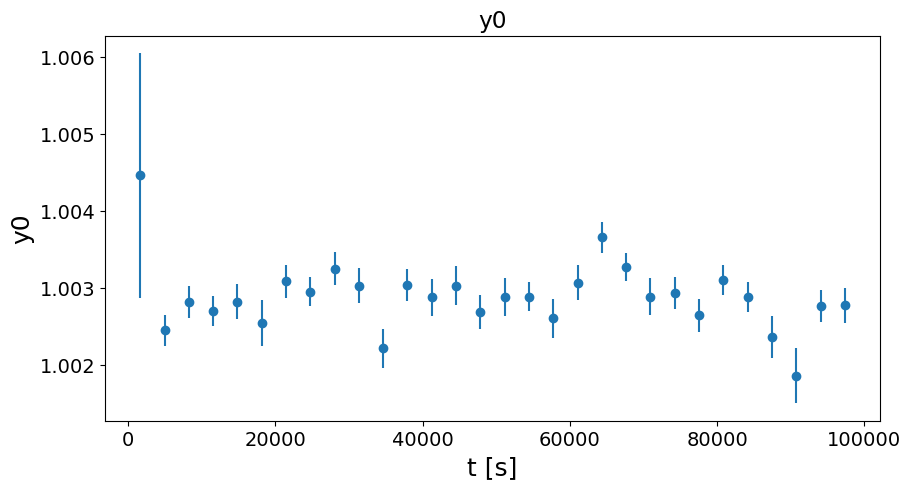

In [25]:
##################
t1_fit = 0
t2_fit = 1e8
##################
 
plt.figure(figsize=(10,5))
fit_out = pd.DataFrame(columns=['tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0'])
fit_out.index.name = 't'
for k in g2.keys():
    #plt.scatter(t[k], g2[k], s=1, label = str(k)+'s')
    plt.scatter(t_mt[k], g2_mt[k], label=str(k)+'s')

    popt, pcov = curve_fit(decorelation_f, t[k][(t1_fit<t[k])*(t[k]<t2_fit)], g2[k][(t1_fit<t[k])*(t[k]<t2_fit)], p0=[3, .7, .02, 1], bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf]))
    fit_out.loc[k] = [popt[0], popt[1], popt[2], popt[3], np.sqrt(pcov[0,0]), np.sqrt(pcov[1,1]), np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])]
    
    x = np.arange(np.min(t[k]), np.max(t[k]), 1e-2)
    y = decorelation_f(x, *popt)
    plt.plot(x, y,)

plt.xlabel('t [s]')
plt.ylabel('g2')
plt.xscale('log')
plt.legend()
plt.show()



plt.figure(figsize=(10,5))
plt.title('tau')
plt.errorbar(fit_out.index, fit_out.tau,  yerr=fit_out.dtau, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('tau [s]')
plt.show()

plt.figure(figsize=(10,5))
plt.title('beta')
plt.errorbar(fit_out.index, fit_out.beta,  yerr=fit_out.dbeta, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('beta')
plt.show()

plt.figure(figsize=(10,5))
plt.title('c')
plt.errorbar(fit_out.index, fit_out.c,  yerr=fit_out.dc, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('c')
plt.show()

plt.figure(figsize=(10,5))
plt.title('y0')
plt.errorbar(fit_out.index, fit_out.y0,  yerr=fit_out.dy0, fmt='o')
plt.xlabel('t [s]')
plt.ylabel('y0')
plt.show()  